<a href="https://colab.research.google.com/github/Parthib-toppo/eCommerce-Transactions-Dataset/blob/main/Parthib_Toppo_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T001

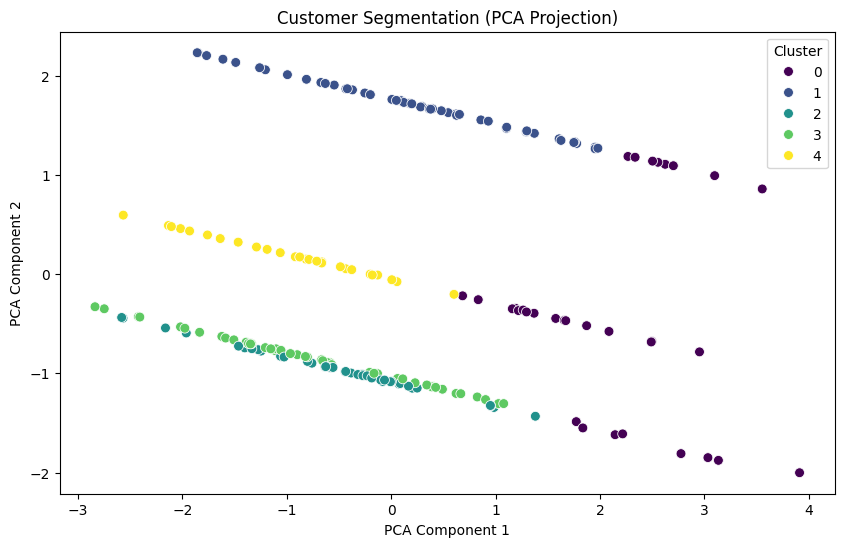

Clustering results saved to Customer_Clusters.csv


In [2]:
# Data Science Assignment: eCommerce Transactions Dataset

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Loading the datasets
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_url = 'https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

# Previewing the datasets
print("Customers Dataset:\n", customers.head(), "\n")
print("Products Dataset:\n", products.head(), "\n")
print("Transactions Dataset:\n", transactions.head(), "\n")

# Preparing the customer_profiles_encoded dataframe
# Aggregating transaction data for each customer
customer_transactions = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
customer_profiles = pd.merge(customer_transactions, customers, on='CustomerID', how='left')

# Encoding categorical data (e.g., Region)
customer_profiles_encoded = pd.get_dummies(customer_profiles, columns=['Region'], drop_first=True)

# Task 3: Customer Segmentation / Clustering
# Preparing data for clustering
clustering_data = customer_profiles_encoded.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'])

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Applying KMeans clustering
num_clusters = 5  # You can tune this value
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(clustering_data_scaled)

# Adding cluster labels to the dataframe
customer_profiles['Cluster'] = kmeans_labels

# Calculating the Davies-Bouldin Index
db_index = davies_bouldin_score(clustering_data_scaled, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index}")

# Visualizing clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title("Customer Segmentation (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Saving clustering results
customer_profiles[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)
print("Clustering results saved to Customer_Clusters.csv")
